In [1]:
import pandas as pd

In [2]:
# READING DATA
data = pd.read_csv('./DATA/raw', sep='\t', header=None, names=['label', 'content'])

In [3]:
data  # displaying the documents

,label,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
# PART 1 -- DATA PREPROCESSING --

In [5]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

# FIRST TIME MIGHT NEED BELOW CODE
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

In [6]:
# Getting all the emails
emails = []
for value in data.values:
    emails.append(value[1])

In [7]:
# Remove punctuations & Tokenization
emails_no_punc = []
for email in emails:
    no_punc = [ch for ch in email if ch not in string.punctuation]
    no_punc = ''.join(no_punc).split()
    emails_no_punc.append(no_punc)

In [8]:
# Stemming
stemmer = PorterStemmer()
emails_no_punc_stemmed = []
for email in emails_no_punc:
    stem = []
    for word in email:
        stem.append(stemmer.stem(word))
    emails_no_punc_stemmed.append(stem)

In [9]:
# Remove Stop Words (stop words are words that do not have actual meanings)
from nltk.corpus import stopwords
emails_no_punc_stemmed_no_stopword = []
for email in emails_no_punc_stemmed:
    no_stop_word = [word.lower() for word in email if 
                    word.lower() not in stopwords.words('english')]
    emails_no_punc_stemmed_no_stopword.append(no_stop_word)
emails_no_punc_stemmed_no_stopword

[['go',
  'jurong',
  'point',
  'crazi',
  'avail',
  'onli',
  'bugi',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amor',
  'wat'],
 ['ok', 'lar', 'joke', 'wif', 'u', 'oni'],
 ['free',
  'entri',
  '2',
  'wkli',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkt',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  '87121',
  'receiv',
  'entri',
  'questionstd',
  'txt',
  'ratetc',
  'appli',
  '08452810075over18'],
 ['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say'],
 ['nah', 'dont', 'think', 'goe', 'usf', 'live', 'around', 'though'],
 ['freemsg',
  'hey',
  'darl',
  '3',
  'week',
  'word',
  'back',
  'id',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chg',
  'send',
  '£150',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'mell',
  'mell',
  'oru',
  'minnaminungint',
  'nurungu',
  'vettam',
  'ha',
  'set',
  'callertun',
  'caller',
  'press',
  

In [10]:
# PART 2 -- DATA EXPLORATION & VISUALIZATION --

In [11]:
# Getting labels
label = []
for value in data.values:
    label.append(0 if value[0] == 'ham' else 1)

In [12]:
# Getting frequent itemset of size 1
ham_words = []
spam_words = []
for i in range(len(label)):
    if label[i] == 0:
        for word in emails_no_punc_stemmed_no_stopword[i]:
            ham_words.append(word)
    else:
        for word in emails_no_punc_stemmed_no_stopword[i]:
            spam_words.append(word)

In [13]:
from collections import Counter

In [14]:
ham_count = Counter(ham_words)
spam_count = Counter(spam_words)

In [15]:
ham_count.most_common(20)

[('u', 985),
 ('im', 452),
 ('go', 417),
 ('get', 360),
 ('2', 309),
 ('come', 295),
 ('call', 289),
 ('ltgt', 276),
 ('ok', 273),
 ('dont', 265),
 ('ur', 246),
 ('thi', 245),
 ('like', 244),
 ('know', 244),
 ('ill', 240),
 ('love', 239),
 ('got', 232),
 ('wa', 225),
 ('good', 225),
 ('time', 219)]

In [16]:
spam_count.most_common(20)

[('call', 366),
 ('free', 216),
 ('2', 173),
 ('txt', 163),
 ('u', 147),
 ('ur', 144),
 ('text', 138),
 ('mobil', 135),
 ('4', 119),
 ('claim', 115),
 ('stop', 115),
 ('repli', 109),
 ('prize', 94),
 ('get', 87),
 ('thi', 87),
 ('onli', 79),
 ('tone', 73),
 ('new', 72),
 ('servic', 72),
 ('send', 70)]

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df_ham_30 = pd.DataFrame(ham_count.most_common(30), columns=['word', 'count'])
df_spam_30 = pd.DataFrame(spam_count.most_common(30), columns=['word', 'count'])

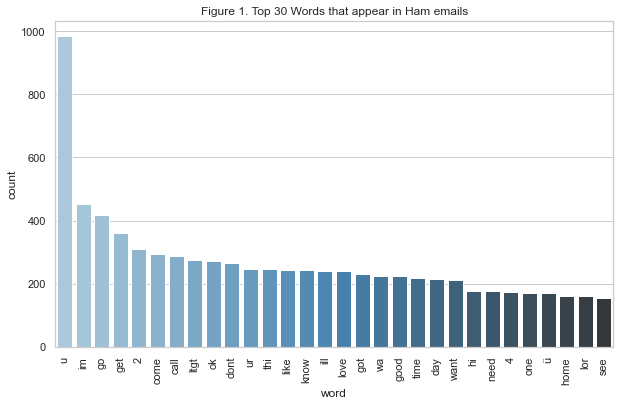

In [19]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='word', y='count', data=df_ham_30, ax=ax, palette="Blues_d")
plt.title("Figure 1. Top 30 Words that appear in Ham emails")
plt.xticks(rotation='vertical');

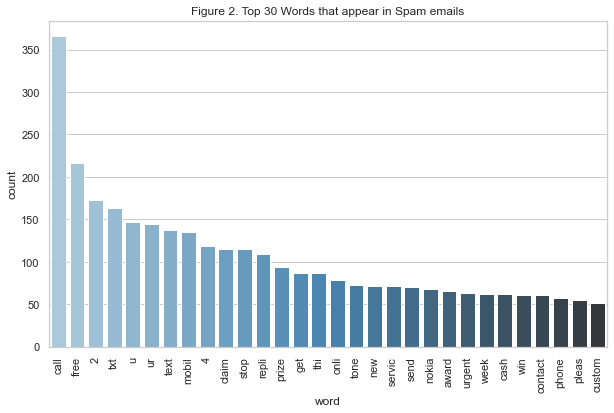

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='word', y='count', data=df_spam_30, ax=ax, palette="Blues_d")
plt.title("Figure 2. Top 30 Words that appear in Spam emails")
plt.xticks(rotation='vertical');

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
# Apply vectorization to the list of emails
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
preprocessed_data = [' '.join(emails_no_punc_stemmed_no_stopword[i]) for i in range(len(emails_no_punc_stemmed_no_stopword))]
transformer = CountVectorizer().fit(preprocessed_data)
transformed_data = transformer.transform(preprocessed_data)

In [23]:
transformed_data.shape
# The data here is really sparse
# since there are a lot of words as features 
# but each email only uses a small fraction of them

(5572, 8086)

In [24]:
# Apply TD-IDF transformation
# https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#from-occurrences-to-frequencies
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(transformed_data)
tfidf_transformed_data = tfidf_transformer.transform(transformed_data)
tfidf_transformed_data

<5572x8086 sparse matrix of type '<class 'numpy.float64'>'
	with 48144 stored elements in Compressed Sparse Row format>

In [25]:
# PART 3 -- Machine Learning --

In [26]:
# split data into train and test
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(tfidf_transformed_data, label, test_size=0.33, random_state=42)
xTrain = xTrain.A
xTest = xTest.A

In [27]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

In [28]:
from sklearn.metrics import precision_score

In [29]:
# Applying supervised machine learning models
# 1. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_model = DecisionTreeClassifier(random_state=42).fit(xTrain, yTrain)
dt_yhat = dt_model.predict(xTest)
dt_acc = accuracy_score(yTest, dt_yhat)
print('accuracy:', dt_acc)
print('precision:', precision_score(yTest, dt_yhat))

accuracy: 0.9597607395323545
precision: 0.8873873873873874


In [30]:
# 2. Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB().fit(xTrain, yTrain)
nb_yhat = nb_model.predict(xTest)
nb_acc = accuracy_score(yTest, nb_yhat)
print('accuracy:', nb_acc)
print('precision:', precision_score(yTest, nb_yhat))

accuracy: 0.9820554649265906
precision: 0.961038961038961


In [31]:
# 3. Support Vector Machine Classifier
from sklearn.svm import SVC
svm_model = SVC(random_state=42).fit(xTrain, yTrain)
svm_yhat = svm_model.predict(xTest)
svm_acc = accuracy_score(yTest, svm_yhat)
print('accuracy:', svm_acc)
print('precision:', precision_score(yTest, svm_yhat))

accuracy: 0.9608482871125612
precision: 0.9182692307692307


In [97]:
# Applying unsupervised machine learning models
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=2, n_init=20, random_state=42).fit(xTrain)
km_yhat = km_model.predict(xTest)
for i in range(len(km_yhat)):
    if km_yhat[i] == 0:
        km_yhat[i] = 1
    else:
        km_yhat[i] = 0
km_acc = accuracy_score(yTest, km_yhat)
print('accuracy:', km_acc)
print('precision:', precision_score(yTest, km_yhat))

accuracy: 0.9255029907558455
precision: 1.0


In [98]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42).fit(xTrain, yTrain)
lr_yhat = lr_model.predict(xTest)
print('accuracy: ', accuracy_score(yTest, lr_yhat))
print('precision: ', precision_score(yTest, lr_yhat))

accuracy:  0.9749864056552474
precision:  1.0


0.866231647634584